<a href="https://colab.research.google.com/github/vieirafrancisco/machine-learning-ufal/blob/master/limpeza_dos_dados_e_analise_preliminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive

drive.mount('drive')
os.chdir('drive/My Drive/UFAL/machine-learning-ufal/video-game-sales')

Mounted at drive


# Imports

In [2]:
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


link: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

# Informações sobre o dataset
###Context
Motivated by Gregory Smith's web scrape of VGChartz Video Games Sales, this data set simply extends the number of variables with another web scrape from [Metacritic](https://www.metacritic.com/game). Unfortunately, there are missing observations as Metacritic only covers a subset of the platforms. Also, a game may not have all the observations of the additional variables discussed below. Complete cases are ~ 6,900  

###Content
Alongside the fields: Name, Platform, YearofRelease, Genre, Publisher, NASales, EUSales, JPSales, OtherSales, Global_Sales, we have:-

    Name - Nome do jogo
    Platform - Console em que jogo é rodado
    YearofRelease - Data de lançamento
    Genre - Gênero do jogo
    Publisher - Editora responsavel pelo jogo
    Critic_Score - Nota dada pelo staff do site do Metacritic  
    Critic_Count - Número de criticos que decidiram o Critic_Score  
    User_score - Nota dada pelos seguidores do site do Metacritic
    User_Count - Número de seguidores que deram o User_Score  
    Developer - Parte responsável pelo desenvolvimento do jogo  
    Rating - rating do [ESRB](https://www.esrb.org/)  
    NA_Sales - Número de vendas do jogo na America do Norte (in millions of units)  
    EU_Sales - Número de vendas do jogo na União Europeia (in millions of units)  
    JP_Sales - Número de vendas do jogo no Japão (in millions of units)  
    Other_Sales - Número de vendas do jogo no resto do mundo, i.e. Africa, Asia 
    excluding Japan, Australia, Europe excluding the E.U.   
    Global_Sales - Número total de vendas no mundo todo (in millions of units)  


Possiveis objetivos que posso buscar alcançar com esse dataset:
- Utilizar algoritmo de regressão para prever a quantidade de vendas em cada região (NA, EU, JP e outros)
- Prever o Rating daquele jogo (com os atributos que tem no dataset pode ser que essa tarefa não seja bem sucedida)

# Análise inicial dos dados e questionamentos

In [3]:
!ls data

video-game-sales-22-dec-2016.csv


In [4]:
df = pd.read_csv('data/video-game-sales-22-dec-2016.csv')

In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Critic_Score é uma nota dada por criticos do Metacritic para aquele jogo (a quantidade de criticos está no atributo Critic_Count). E o User_Score é a nota dada dos inscritos do Metacritic e a quantidade de votos está no atributo User_Count.  
É interessante verificar a relação entre o Critic_Score e o User_Score para verificar consistência na nota.  
O Critic_Score está na escala 0 a 100 e o User_Score de 0 a 10. Fazer uma normalização da escala entre esses dois atributos antes de fazer uma análise.  
Além disso o User_Score tá como string e muitas células tem o valor 'tbd' - to be defined. Precisa de uma limpeza para poder converter para float

In [7]:
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Rating - The ESRB ratings: https://www.esrb.org/ratings-guide/  

E: Conteúdo geralmente adequado para todo mundo  
E10+: Conteúdo geralmente adequado para pessoas de 10 anos a cima  
T: Conteúdo geralmente adequado para pessoas de 13 anos a cima  
M: Conteúdo geralmente adequado para pessoas de 17 anos a cima  
AO: Somente adultos 18+  
RP: Ainda está no processo para receber a nota  
EC: Contém conteúdo considerado próprio para crianças até 3 anos  
K-A: Contém conteúdo destinado a crianças maiores de 6 anos podendo agradar pessoas com mais idade  


In [8]:
from collections import Counter
Counter(df['Rating'])

Counter({'AO': 1,
         'E': 3991,
         'E10+': 1420,
         'EC': 8,
         'K-A': 3,
         'M': 1563,
         'RP': 3,
         'T': 2961,
         nan: 6769})

In [9]:
nan_rating = len(df[df['Rating'].isnull()])
total = len(df)
print(f'Número total de tuplas: {total}, Número de tuplas com NaN no Rating: {nan_rating}, propoção: {round(nan_rating / total * 100, 1)}%')

Número total de tuplas: 16719, Número de tuplas com NaN no Rating: 6769, propoção: 40.5%


40.5% das tuplas tem NaN no atributo rating  
Qual melhor decisão tomar?
- Preencher cada celula com relação ao maior valor daquele rating no grupo do gênero do jogo? Mediana talvez?
- Remover as tuplas?

Aproximadamente a metade dos ratings são valores vazios (NaN) e a outra metade é distribuida nos demais grupos  
Primeira coisa que passa na minha mente é verificar se tem relação entre esse rating com o gênero do jogo, nos dados não vazios. Caso tenha uma grande relação pode ser que eu possa preencher esses espaços vazios dependendo do gênero do jogo. Porém se não tiver muita relação posso pensar em remover as tuplas com células vazias

In [10]:
# remover tuplas com o genero NaN (as tuplas com genero NaN são as mesmas com o nome do jogo com NaN)
df.drop(df[df['Genre'].isnull()].index, inplace=True)

In [11]:
# agrupar por gênero e verificar a quantidade de cada rating
def f(df_):
  d = dict(Counter(df_['Rating']))
  d['genre'] = df_['Genre'].iloc[0]
  return pd.Series(d)

group_by_genre = df.groupby('Genre').apply(f)

In [12]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [13]:
tuples = []
for genre in df['Genre'].unique():
  try:
    tuples.append(group_by_genre[genre])
  except:
    print(genre)
tmp = pd.DataFrame(tuples)
tmp.replace(np.nan, 0, inplace=True)
tmp.set_index('genre', inplace=True)
tmp

,E,NaN,E10+,T,M,RP,K-A,EC,AO
genre,,,,,,,,,
Sports,1188,839,107,198,16.0,0.0,0.0,0.0,0.0
Platform,358,319,144,64,3.0,0.0,0.0,0.0,0.0
Racing,585,377,96,172,18.0,1.0,0.0,0.0,0.0
Role-Playing,84,723,111,420,162.0,0.0,0.0,0.0,0.0
Puzzle,289,238,43,10,0.0,0.0,0.0,0.0,0.0
Misc,457,868,167,239,13.0,0.0,1.0,5.0,0.0
Shooter,48,304,58,348,565.0,0.0,0.0,0.0,0.0
Simulation,326,305,48,190,5.0,0.0,0.0,0.0,0.0
Action,416,1182,481,681,608.0,0.0,0.0,1.0,1.0


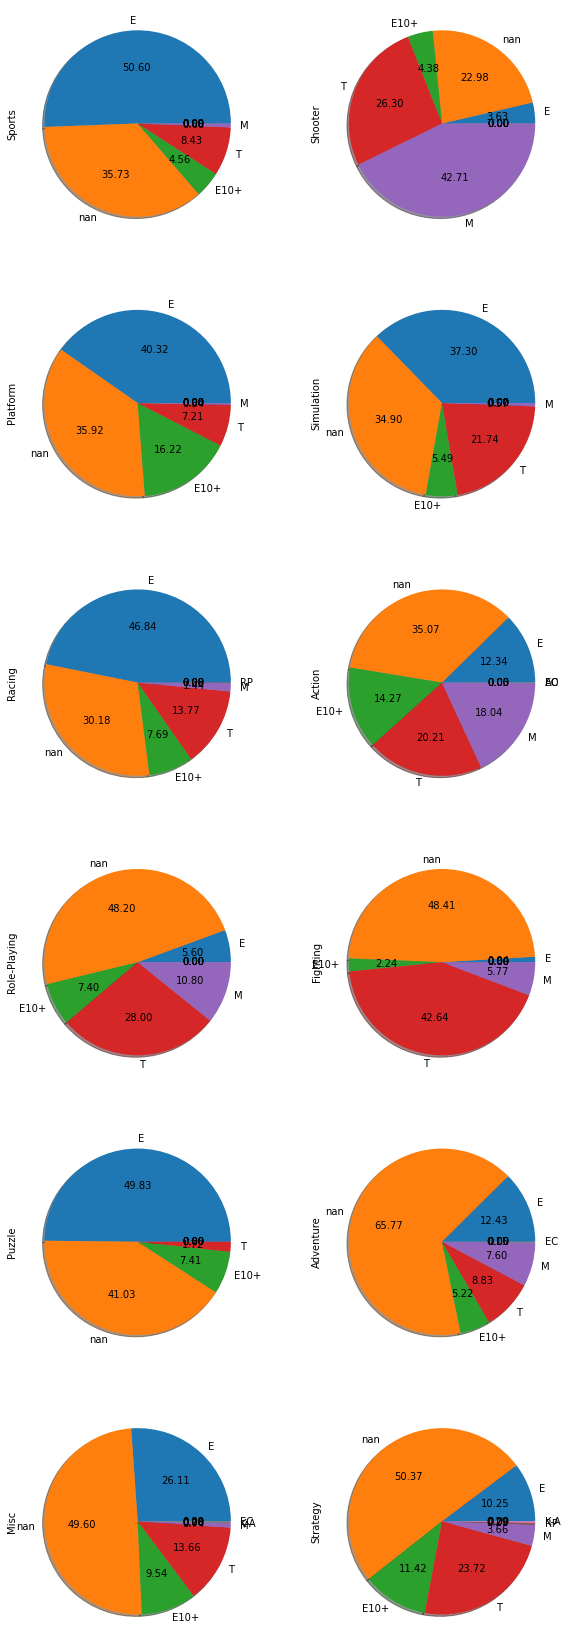

In [14]:
row, col = 6, 2
fix, ax = plt.subplots(row, col, figsize=(10, 30))
c = 0
for idx, genre in enumerate(df['Genre'].unique()):
  if idx and idx%row==0:
    c += 1
  tmp.loc[genre].plot.pie(ax=ax[idx%row][c], shadow=True, autopct='%.2f')

- A maioria dos jogos de esporte/corrida tem a classificação recomendada livre (E)  
- Os gêneros Role_Playing e Fighting tem a maioria dos valores vazios. Porém, dos que tem, boa parte dos jogos são indicados por pessoas com idade +13 (T) ou +17 (M)  
- Os de Shooter a maioria é +17 (M), que é totalmente justificavel por conta da violência nos jogos 
- Action e Simulation tem um balanceamento com relação ao Rating  

Como boa parte dos gêneros influenciam o tipo de Rating então para preencher essas células que estão com NaN, eu vou considerar colocar a mediana de cada Rating com relação ao gênero. Posteriormente no processo eu posso verificar se teve um resultado positivo ou negativo.

In [15]:
print(f"Critic_Count - STD: {df['Critic_Count'].std()}, MIN: {df['Critic_Count'].min()}, MAX: {df['Critic_Count'].max()}")
print(f"User_Count - STD: {df['User_Count'].std()}, MIN: {df['User_Count'].min()}, MAX: {df['User_Count'].max()}")

Critic_Count - STD: 18.98049453458247, MIN: 3.0, MAX: 113.0
User_Count - STD: 561.282326247378, MIN: 4.0, MAX: 10665.0


Critic_Count e User_Count estão variando  bastante. Ou seja, tem notas que são atribuidas por 4 pessoas e notas atribuidas por 10000 pessoas. O grau de relevância da nota se da pela proporção com relação a quantidade de pessoas. Ideias:  
- Gerar algum tipo de atributo de relevância para as notas?  
- Qual metrica é interessante utilizar para quanto maior a quantidade de votos melhor a nota?



# Limpeza dos Dados

- [ ] Criar dois novos atributos com relação as notas e a quantidade de votos
- [x] Remover os atributos Developer, Global_Sales porque não vou utilizar
- [x] Pré-processar o ano de lançamento
- [ ] Fazer conversões e reescala
- [ ] Verificar importância dos atributos com relação aos atributos de vendas

### Rating
Substituir campos com NaN pelo valor que tem mais repetição no campo rating agrupando pelo gênero do jogo

In [193]:
def get_max(d):
  m = 0
  result = 'E'
  for key, count in d.items():
    if key is not np.nan and count >= m:
      m = count
      result = key
  return result

# agrupar por gênero e pegar o mais frequente do Rating
rating_list = []
for genre in df['Genre'].unique():
  rating = df[df['Genre']==genre]['Rating']
  m = get_max(Counter(rating))
  rating.fillna(m, inplace=True)
  for value in rating:
    rating_list.append(value)
df['Rating'] = rating_list

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### Year_of_Release

In [16]:
# remover atributos que não vou utilizar
df.drop(['Developer', 'Global_Sales'], axis=1, inplace=True)

In [17]:
list(df[df['Year_of_Release'].isnull()]['Name'].head())

['Madden NFL 2004',
 'FIFA Soccer 2004',
 'LEGO Batman: The Videogame',
 'wwe Smackdown vs. Raw 2006',
 'Space Invaders']

Muitos jogos que estão com NaN no campo do ano de lançamento tem o nome do jogo com um ano. Vou deduzir que esse seja o ano do lançamento do jogo, então vou atribuir para essa célula.  
~250 tuplas estão com o campo do ano de lançamento dos jogos com NaN, as demais que sobrarem do pré-processamento anterior, eu irei atribuir a mediana para fazer uma análise utilizando esse atributo.#

In [18]:
# função para verificar se a string é referente a um ano
def is_year(string):
  try:
    year = int(string)
    return len(string) == 4
  except:
    return False

# filtrar os nomes dos jogos com tuplas que tem células vazias no atributo Year_of_Realease
names = df[df['Year_of_Release'].isnull()]['Name']
index = df[df['Year_of_Release'].isnull()]['Name'].index
years = {}
for name, idx in zip(names, index):
  for string in name.split():
    if is_year(string):
      years[idx] = int(string)
      break
print(years)

{183: 2004, 377: 2004, 475: 2006, 1650: 2003, 3486: 2002, 4775: 2003, 5156: 2003, 5655: 2005, 5889: 2003, 8919: 2005, 13196: 2011, 13930: 2006, 15955: 2008, 16081: 2007, 16376: 2008}


In [19]:
for idx, year in years.items():
  df['Year_of_Release'].iloc[idx] = year

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
# os demais com valores NaN no Year_of_Release eu vou atribuir a mediana
median_year = df['Year_of_Release'].median()
df['Year_of_Release'].fillna(median_year, inplace=True)

In [21]:
# converter os anos que estão em string para inteiro
df['Year_of_Release'] = list(map(int, df['Year_of_Release']))

### User_Score/Count e Critic_Score/Count
Muitas células com valor 'tbd' - to be defined

In [22]:
df[df['Critic_Score'].isnull()]['User_Score'].unique()

array([nan, 'tbd', '4.8', '4.9', '4.5', '8.2', '6.2', '8', '4.2', '7.7',
       '7', '7.6', '3.2', '6.7', '9', '8.6', '8.3', '7.4', '6.6', '5.5',
       '8.4', '8.5', '4.7', '5.1', '7.8', '3', '8.1', '2.9', '6.5', '2.7',
       '2.5', '7.1', '4.3', '3.5', '7.3', '5', '6.8', '7.2', '2.8', '5.2',
       '3.1', '4.6', '3.3', '0', '1.6', '5.4', '6', '5.3', '3.8', '3.4',
       '6.4', '7.9', '6.1', '8.9', '5.6', '2.4', '5.8', '8.7', '5.7',
       '7.5', '9.2', '1.8', '4.4', '1.7', '9.1', '1.1', '8.8', '6.3',
       '0.3', '4.1', '3.7', '5.9', '0.7', '6.9', '2', '1.3', '0.2', '9.5',
       '1.4', '9.3', '0.9', '4', '9.7', '1.2', '3.9', '0.6'], dtype=object)

In [23]:
def f(local_df):
  d = {}
  d['qtd_non_tbd'] = len(local_df[local_df['User_Score'] != 'tbd'])
  d['qtd_tbd'] = len(local_df[local_df['User_Score'] == 'tbd'])
  d['qtd_nan'] = len(local_df[local_df['User_Score'].isnull()])
  return pd.Series(data=d)

tbd_df = df.groupby('Name').apply(f)

In [138]:
# quantidade de tuplas com tbd e quantidade de tuplas sem o tbd agrupado pelo nome do jogo
tbd_df.head(3)

,qtd_non_tbd,qtd_tbd,qtd_nan
Name,,,
Beyblade Burst,1,0,1
Fire Emblem Fates,1,0,1
Frozen: Olaf's Quest,2,0,2


User_Score está no formato de string  
Será necessario converter para float, porém 2425 tuplas tem o valor 'tbd' = 'to be defined' = 'a ser definido'  
Inicialmente vou agrupar pelo nome dos jogos e vou atribuir o maior (ou menor) valor de todas as tuplas. E as tuplas que sobrarem eu vou atribuir o valor nan para posteriormente utilizar o dropna do NumPy  

### Platform
As tuplas com o mesmo nome de jogo são diferenciadas pela plataforma em que o jogo está rodando. O atributo de plataforma me parece um atributo extremamente relevante para os atributos de vendas. Porque pode ser que uma região tem predileção por um tipo de plataforma, ou seja, que a região compra mais jogos daquela plataforma específicaca.
- [x] Verificar visualmente o atributo plataforma com relação a quantidade de vendas em cada região do dataset.

In [25]:
# verificar a plataforma e a quantidade de vendas para cada região do jogo uDraw Studio: Instant Artist
df[df['Name'] == 'uDraw Studio: Instant Artist'][['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8281,Wii,0.06,0.09,0.0,0.02
15614,X360,0.01,0.01,0.0,0.00


In [124]:
# agrupar por plataforma e retornar a soma total de cada região
def f(df_):
  d = {}
  d['NA_Sales'] = sum(df_['NA_Sales'])
  d['EU_Sales'] = sum(df_['EU_Sales'])
  d['JP_Sales'] = sum(df_['JP_Sales'])
  d['Other_Sales'] = sum(df_['Other_Sales'])
  #d['qtd_unique_games'] = len(df_['Name'].unique())
  return pd.Series(d)

sales_by_platform = df.groupby('Platform').apply(f)

In [137]:
sales_by_platform.head(2)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
2600,90.6,5.47,0.0,0.91
3DO,0.0,0.00,0.1,0.00


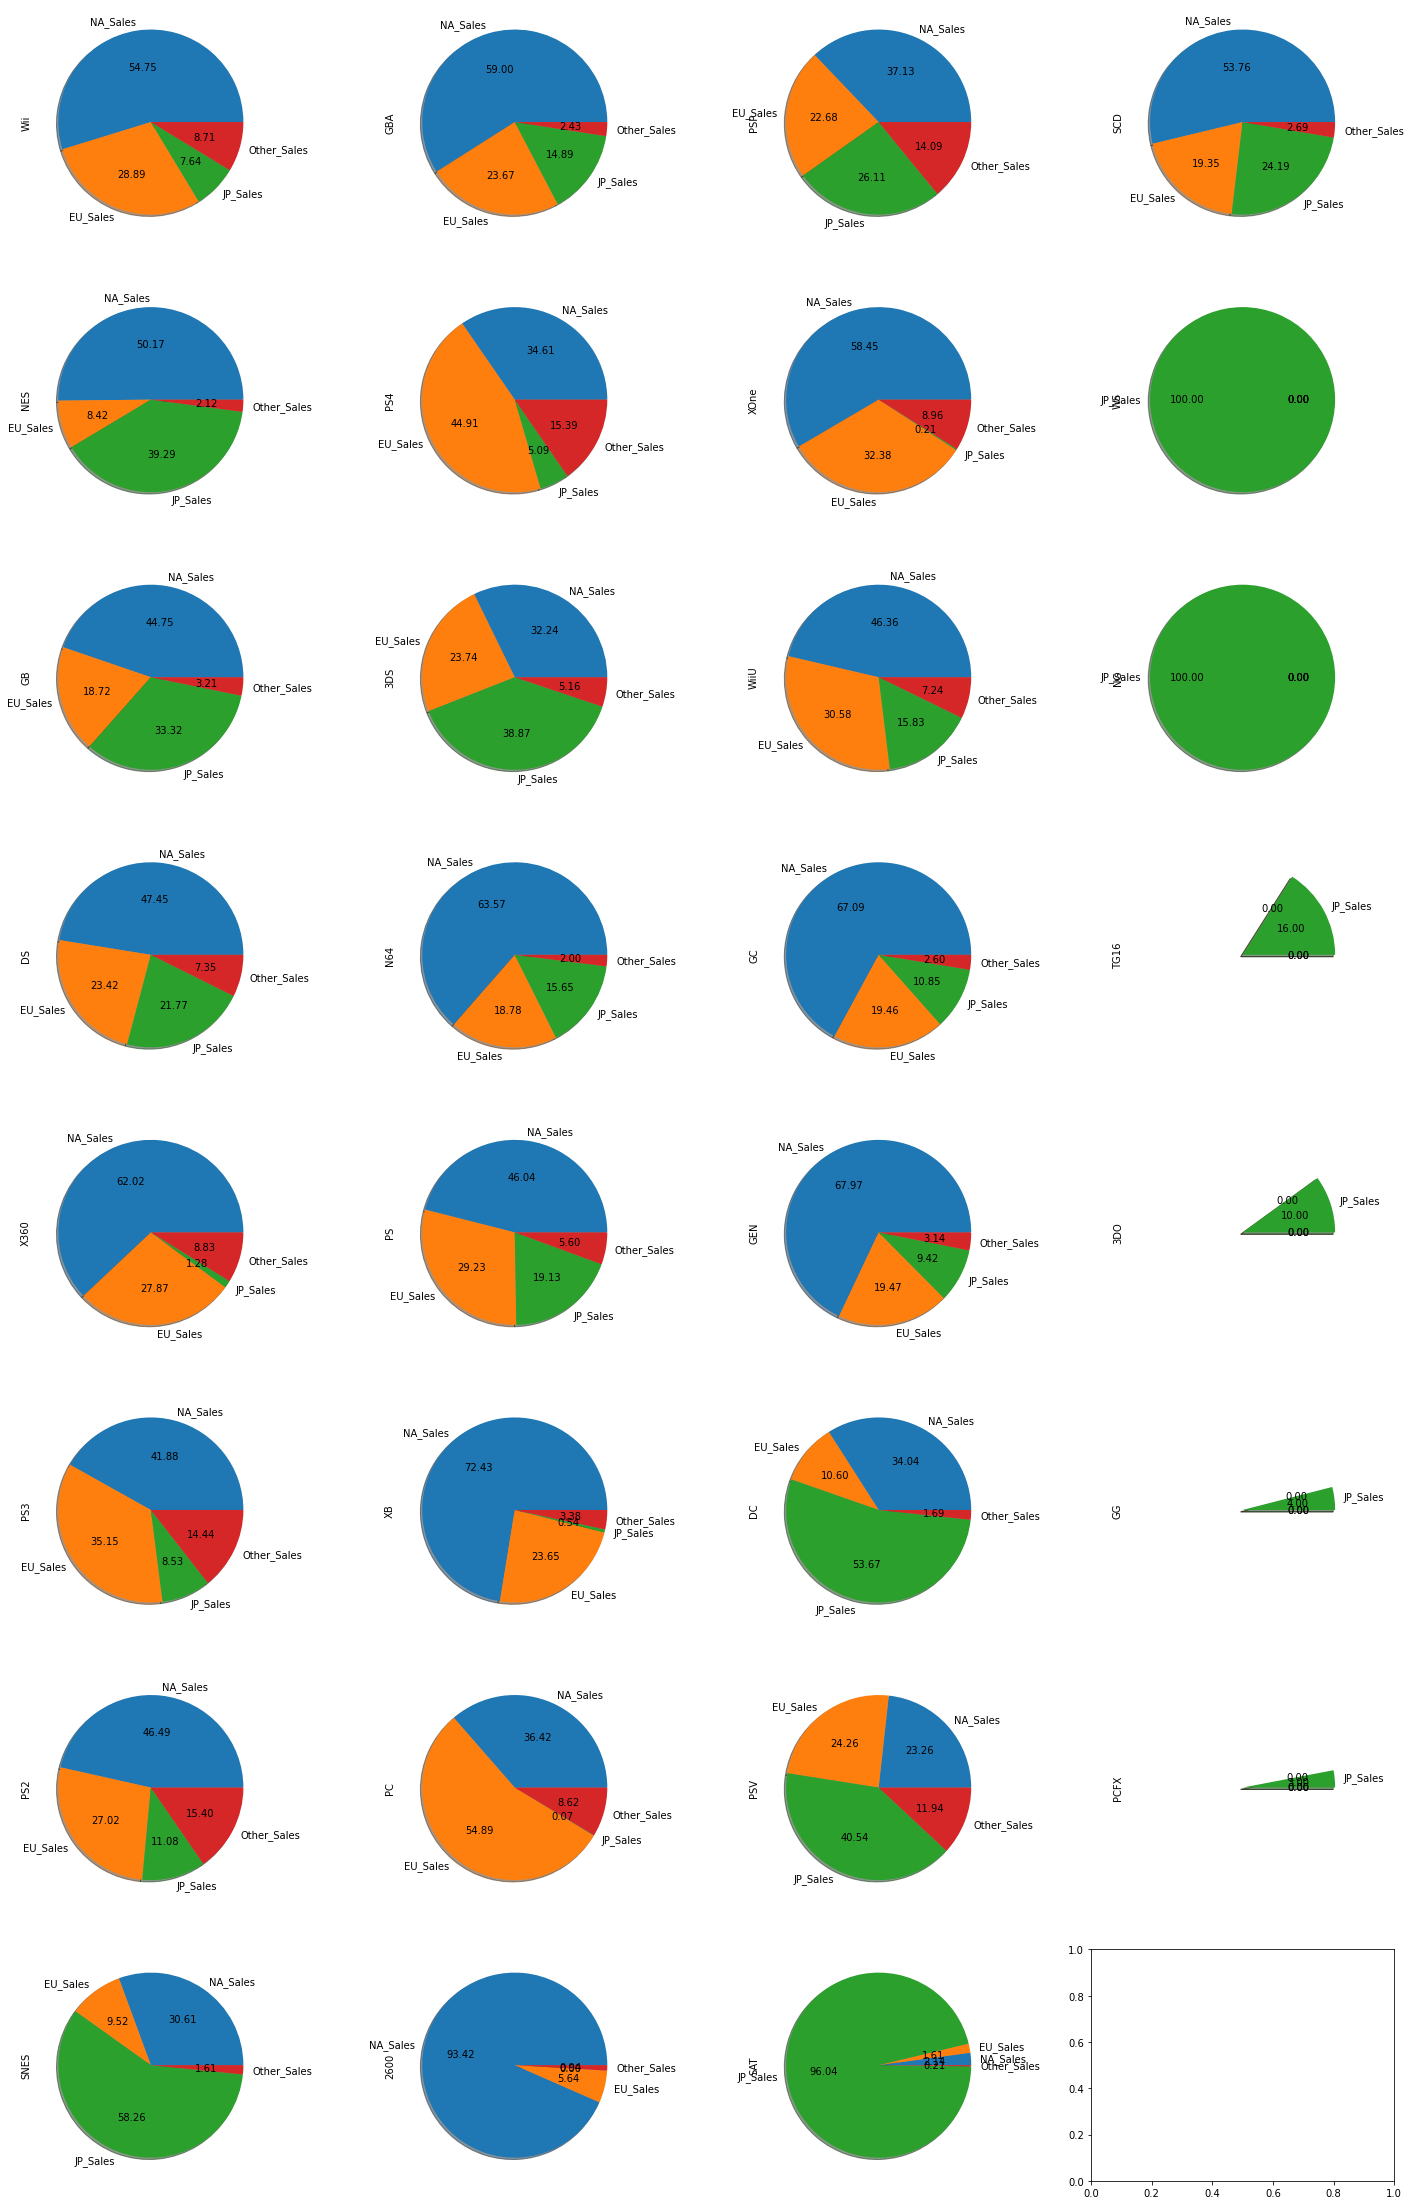

In [136]:
row, col = 8, 4
fix, ax = plt.subplots(row, col, figsize=(25, 40))
c = 0
for idx, platform in enumerate(df['Platform'].unique()):
  if idx and idx%row==0:
    c += 1
  sales_by_platform.loc[platform].plot.pie(ax=ax[idx%row][c], shadow=True, autopct='%.2f')

Boa parte dos consoles da nintendo são bastante vendidos na américa do norte, enquanto os da playstation tendem a ter mais sucesso na união europeia. Porém, não me parece ter muito padrão com relação a vendas nas regiões tomando como base a plataforma dos jogos. Creio que se adicionar mais tuplas e mais atributos com relação a popularidade regional, esse tipo de informação pode ser mais relevante.  
Mesmo assim vou manter o atributo porque ele pode ser relante para atingir meu objetivo de previsão com relação a quantidade de vendas dos jogos por região.


### Publisher

In [200]:
# número de células vazias no atributo Publisher
len(df[df['Publisher'].isnull()])

54

Como a quantidade de tuplas que tem valores NaN no atributo Publisher é bem pequena e como boa parte dessas tuplas tem os valores de score com NaN, eu vou remover (dar drop) essas tuplas.

# Visualização dos Dados e análise preliminar
Inicialmente vou fazer uma análise com o dataset sem nenhuma tupla com NaN e sem nenhum pré-processamento. Depois vou comparar os resultados com o dataset com pré-processamento e verificar novos insights e possíveis melhorias

### Dataset sem tuplas com NaN e sem pré-processamento

In [26]:
df_ = pd.read_csv('data/video-game-sales-22-dec-2016.csv')

In [27]:
# dropar NaN do dataset
without_nan_df = df_.dropna(axis=0)
without_nan_df['User_Score'].replace('tbd', np.nan)
without_nan_df = without_nan_df.dropna(axis=0)

In [28]:
# dividir todos os valores do critic score por 10 para ficar no range de 0 a 10
without_nan_df['Critic_Score'] = [score / 10 for score in without_nan_df['Critic_Score']]
# converter os valores do user score de string para float
without_nan_df['User_Score'] = [float(score) for score in without_nan_df['User_Score']]

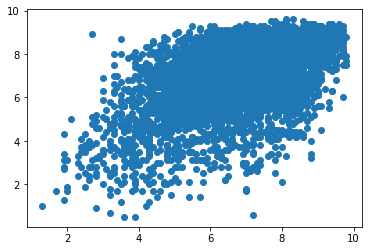

In [29]:
plt.scatter(without_nan_df['Critic_Score'], without_nan_df['User_Score'])

In [30]:
without_nan_df['Critic_Score'].corr(without_nan_df['User_Score'])

0.5803183710099119

A correlação entre o Critic_Score e o User_Score é diretamente proporcional com um valor de 0.58. Que é somente um pouco próximo de 1, mas que já indica que as notas atribuidas pelos críticos são coerentes com as notas dos inscritos.

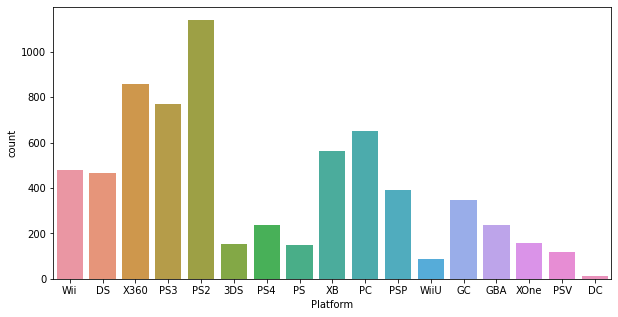

In [31]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.countplot(data=without_nan_df, x='Platform', ax=ax)

A maior quantidade de jogos vendidos são de Playstation 2, seguido pelo Xbox 360 e Playsation 3

# Conclusões

